In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [2]:
betamaxarray = ['0.5','1.0','2.0']
betamaxarray2 = ['05','1','2']
betamaxarray3 = ['0.5','1','2']

In [3]:
ta = np.linspace(0,800,800)
tau05 = np.linspace(0,0.5,800)
tau1 = np.linspace(0,1,800)
tau2 = np.linspace(0,2,800)

k = np.full(100,1)

garray = [0 for i in range(21)]
gsqaure = [0 for i in range(len(garray))]
gsquareround = [0 for i in range(len(garray))]

for i in range(len(garray)):
    if (i<20):
        garray[i+1] = round(garray[i]+0.05,2)
        gsqaure[i+1] = round(garray[i+1]**2,4)
        gsquareround[i+1] = round(garray[i+1]**2,4)
    elif (i==20):
        gsqaure[i] = '1'
        gsquareround[i] = '1.0'

In [4]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0

In [5]:
for j in betamaxarray3:
    for k in gsqaure:
        globals()['N_BETA{}G{}'.format(j,k)] = pd.read_csv('nTrap_grid800_beta{}_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['N_{}_{}'.format(a,b)] = np.array(globals()['N_BETA{}G{}'.format(j,k)].y)
        b += 1
        
    a += 1
    b = 0

In [6]:
for j in betamaxarray2:
    for k in gsqaure:
        globals()['TRAP_BETA{}G{}'.format(j,k)] = pd.read_csv('Trap_grid800_beta{}_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['TRAP_{}_{}'.format(c,d)] = np.array(globals()['TRAP_BETA{}G{}'.format(j,k)].y)
        d += 1
        
    c += 1
    d = 0

In [7]:
for j in betamaxarray:
    for k in gsquareround:
        globals()['ED_BETA{}G{}'.format(j,k)] = pd.read_csv('Exacttest_grid800_size21_beta{}_g_{}.txt'.format(j,k),header=None,names=['x','y'],delim_whitespace=True)

        globals()['ED_{}_{}'.format(e,f)] = np.array(globals()['ED_BETA{}G{}'.format(j,k)].y)
        f += 1 
        
    e += 1
    f = 0

In [29]:
for l in range(0,3):
    for m in range(0,21):
        try:
            globals()['SIGNDEV_{}_{}'.format(l,m)] = np.abs(globals()['ED_{}_{}'.format(l,m)] - globals()['TRAP_{}_{}'.format(l,m)])
            globals()['PREDEV_{}_{}'.format(l,m)] = np.abs(globals()['ED_{}_{}'.format(l,m)] - globals()['N_{}_{}'.format(l,m)])
        except:
            None


In [149]:
gc = 14

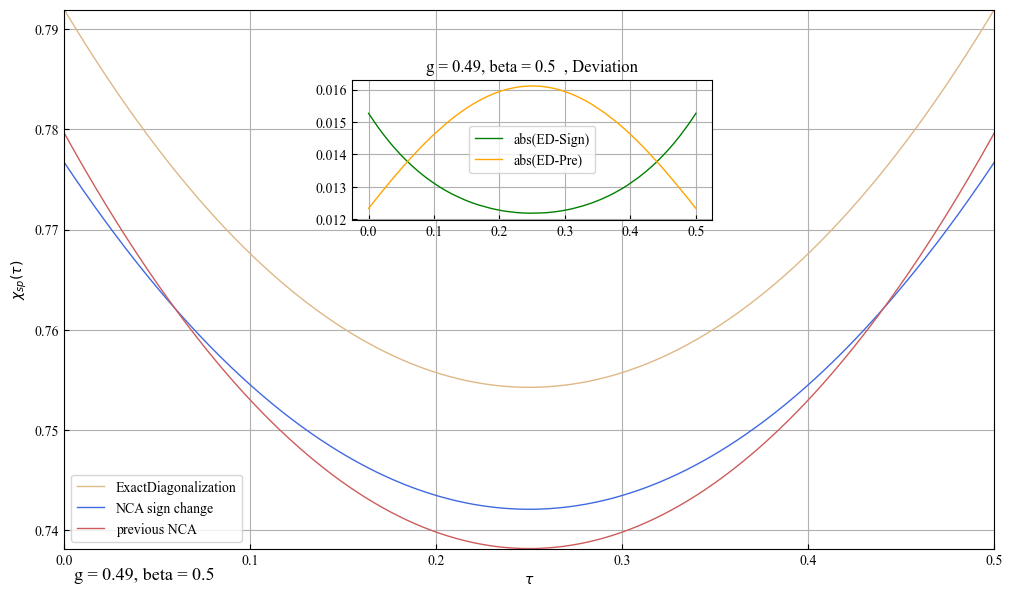

In [151]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[0])

plt.figure(figsize=(12,7))
plt.rcParams["font.family"] = "Times New Roman"

plt.axis([min(tau05), max(tau05), min(globals()['N_0_{}'.format(gc)]), max(globals()['ED_0_{}'.format(gc)])] )
plt.plot(tau05,globals()['ED_0_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
plt.plot(tau05,globals()['TRAP_0_{}'.format(gc)],label='NCA sign change',linewidth='1', color = 'royalblue')
plt.plot(tau05,globals()['N_0_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'indianred')
plt.text(0.005,0.735,'g = ' + tit1 + ', beta = ' + tit2 ,fontsize=13)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')


a = plt.axes([0.365, 0.58, 0.3, 0.2])
plt.plot(tau05,globals()['SIGNDEV_0_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'green')
plt.plot(tau05,globals()['PREDEV_0_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'orange')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()


plt.show()

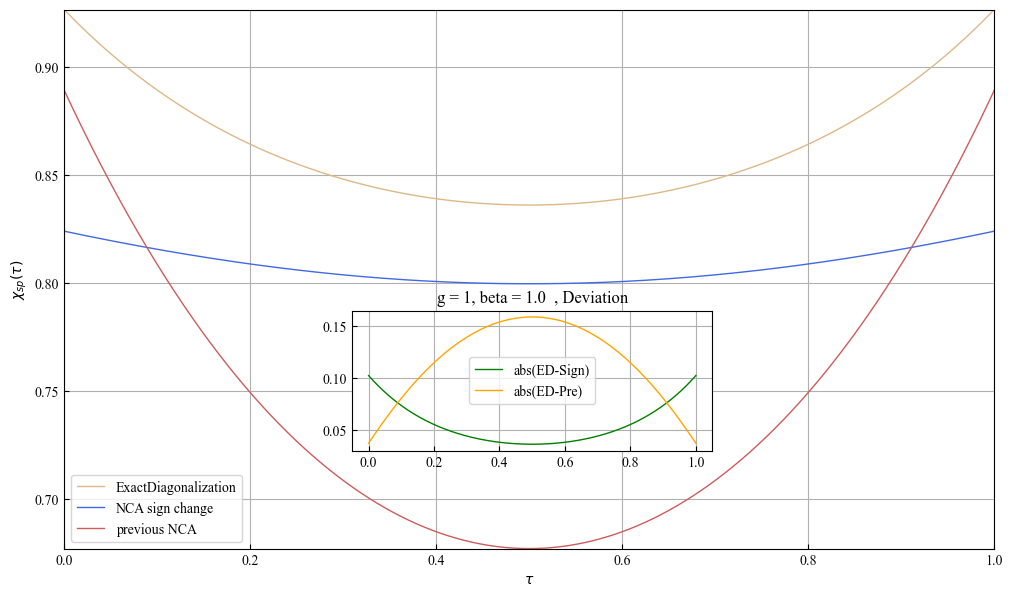

In [143]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[1])

plt.figure(figsize=(12,7))
plt.rcParams["font.family"] = "Times New Roman"

plt.axis([min(tau1), max(tau1), min(globals()['N_1_{}'.format(gc)]), max(globals()['ED_1_{}'.format(gc)])] )
plt.plot(tau1,globals()['ED_1_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
plt.plot(tau1,globals()['TRAP_1_{}'.format(gc)],label='NCA sign change',linewidth='1', color = 'royalblue')
plt.plot(tau1,globals()['N_1_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'indianred')

plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')


a = plt.axes([0.365, 0.25, 0.3, 0.2])
plt.plot(tau1,globals()['SIGNDEV_1_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'green')
plt.plot(tau1,globals()['PREDEV_1_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'orange')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')

plt.grid()
plt.legend()

plt.show()

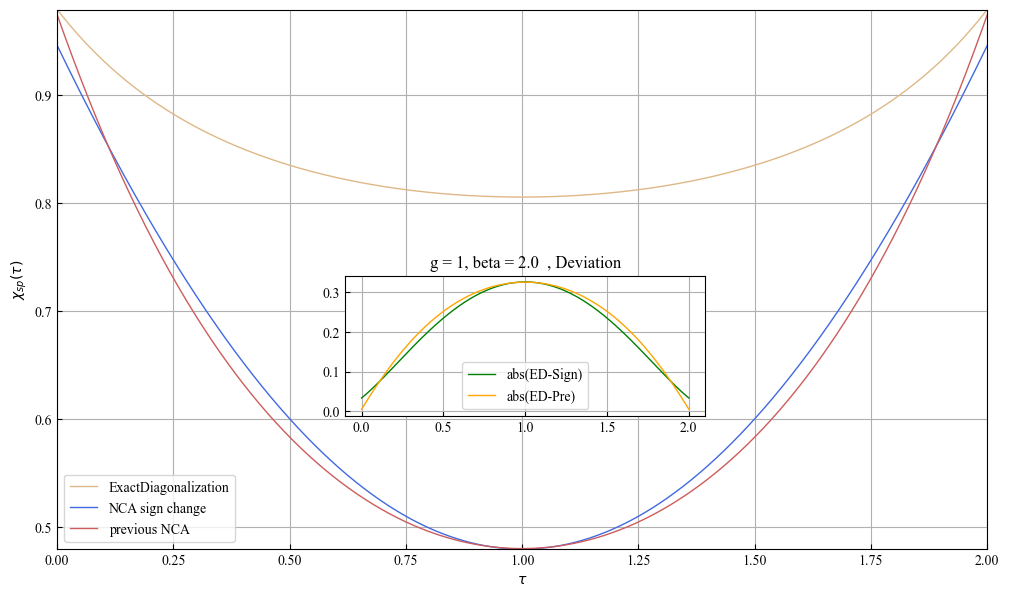

In [140]:
tit1 = str(gsqaure[gc])
tit2 = str(betamaxarray[2])

plt.figure(figsize=(12,7))
plt.rcParams["font.family"] = "Times New Roman"

plt.axis([min(tau2), max(tau2), min(globals()['N_2_{}'.format(gc)]), max(globals()['ED_2_{}'.format(gc)])] )
plt.plot(tau2,globals()['ED_2_{}'.format(gc)],label='ExactDiagonalization',linewidth='1',color = 'burlywood')
plt.plot(tau2,globals()['TRAP_2_{}'.format(gc)],label='NCA sign change',linewidth='1', color = 'royalblue')
plt.plot(tau2,globals()['N_2_{}'.format(gc)],label='previous NCA',linewidth='1', color = 'indianred')

plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')


a = plt.axes([0.365, 0.3, 0.3, 0.2])
plt.plot(tau2,globals()['SIGNDEV_2_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'green')
plt.plot(tau2,globals()['PREDEV_2_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'orange')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()

plt.show()